<a href="https://colab.research.google.com/github/seanvw/Ann_Egs/blob/main/Clothes_net_sw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the clothing example

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


downlod the training data

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


labels

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


inspect data

In [ ]:
train_images.shape

(60000, 28, 28)

dump structure

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

the shape of the first image

In [ ]:
train_images[0].shape

(28, 28)

plot first image

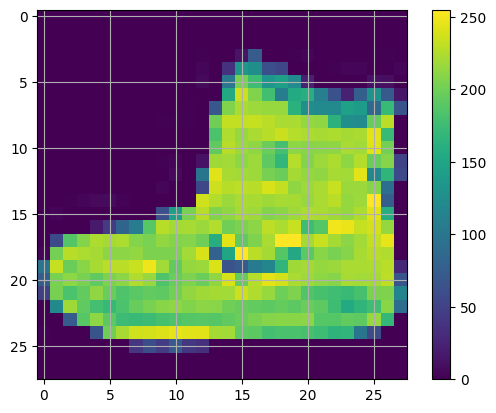

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)

scale 0 to 1, train and test

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

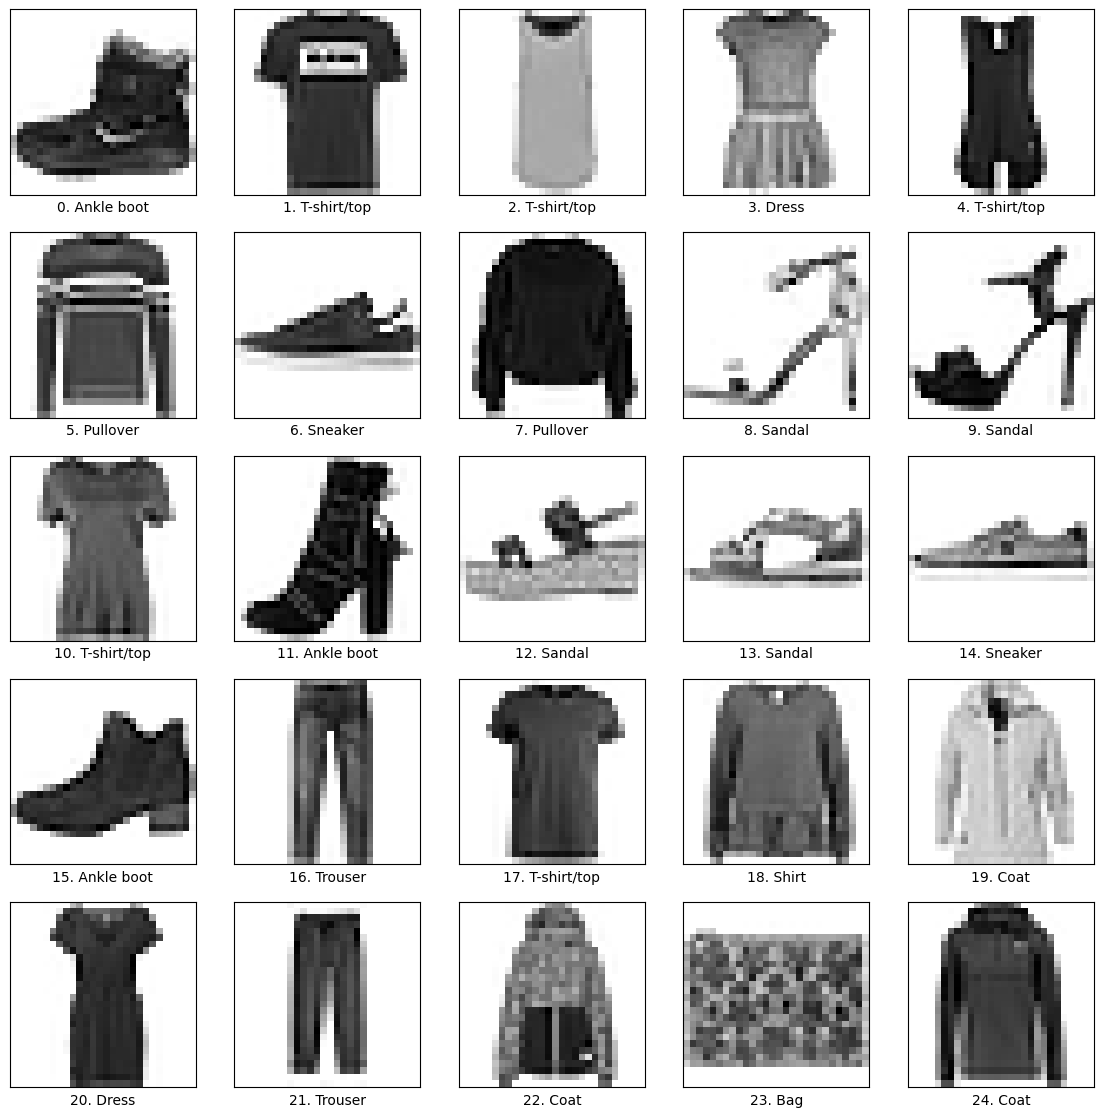

In [ ]:
plt.figure(figsize=(14,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(i) + ". " + class_names[train_labels[i]] )

compile model - 2D to 1D, Dense 128 neurons, 10 classes

In [ ]:
num_L1 = 128
#num_L1 = 64
#num_L1 = 256
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(num_L1, activation=tf.nn.relu),
    keras.layers.Dense(num_L1/2, activation=tf.nn.relu),
    keras.layers.Dense(num_L1/4, activation=tf.nn.relu),
    keras.layers.Dense(num_L1/2, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

settings for model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train

In [ ]:
model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5279 - accuracy: 0.8077
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3923 - accuracy: 0.8576
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3603 - accuracy: 0.8700
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3449 - accuracy: 0.8786
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3352 - accuracy: 0.8812
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.8835
Epoch 7/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3372 - accuracy: 0.8822
Epoch 8/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3432 - accuracy: 0.8839
Epoch 9/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3458 - accuracy: 0.8844
Epoch 10/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.346

evaluate

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.7927 - accuracy: 0.8678
Test accuracy: 0.8677999973297119


predict and look at 1st p-values

In [ ]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 2s 3ms/step


array([0.0000000e+00, 0.0000000e+00, 2.4336322e-38, 0.0000000e+00,
       2.3275062e-33, 2.3570339e-20, 1.5400401e-30, 5.8495037e-16,
       1.3328474e-33, 9.9999994e-01], dtype=float32)

which is best?

In [ ]:
np.argmax(predictions[0])

9

functions for plotting

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

choose image and plot predictions

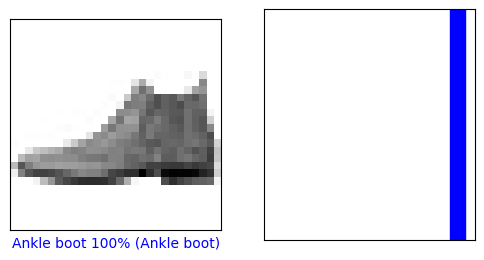

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

blue correct, red wrong

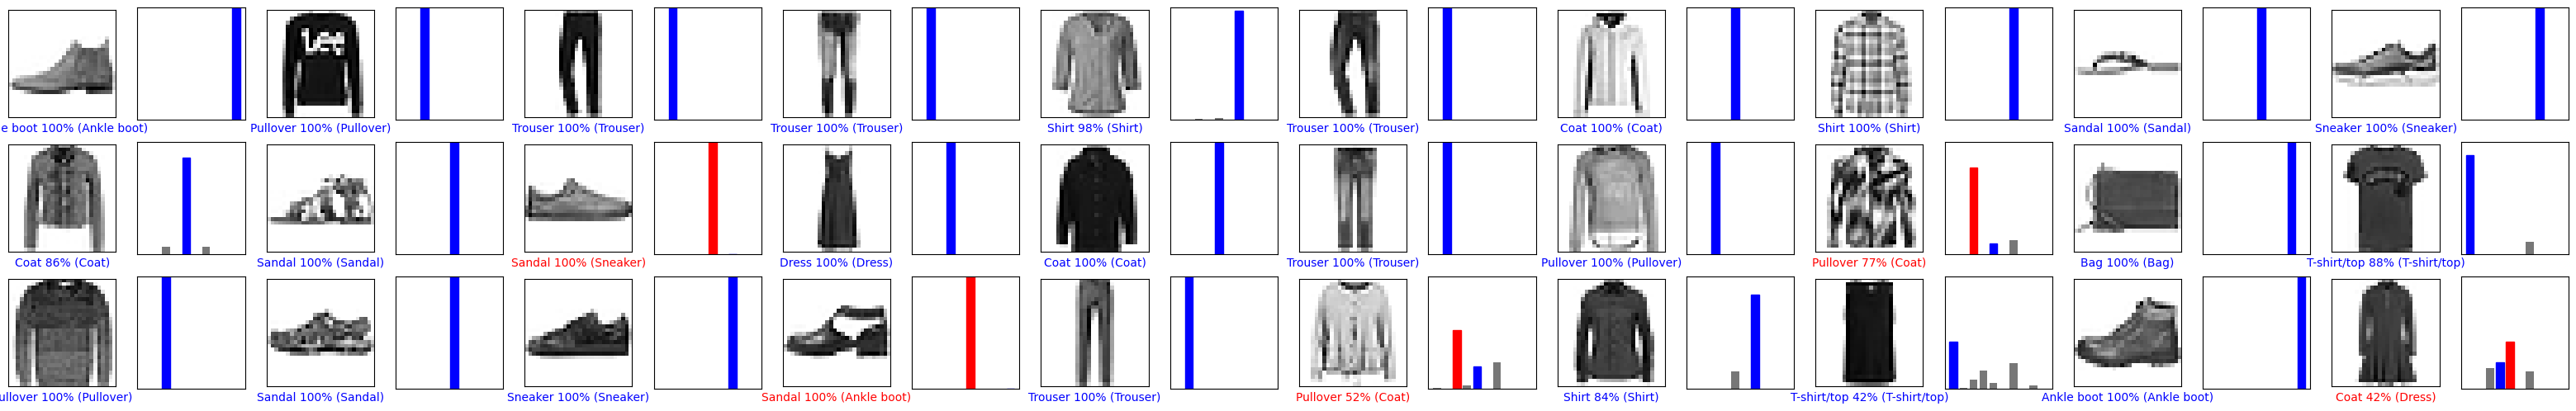

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)